In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/preprocessed-imdb-dataset/preprocessed_imdb_data.csv')
df.head()

,Unnamed: 0,review,sentiment
0,0,one reviewer mention watch 1 oz episode hook r...,positive
1,1,wonderful little production film technique una...,positive
2,2,think wonderful way spend time hot summer week...,positive
3,3,basically family little boy jake think zombie ...,negative
4,4,petter matteis love time money visually stunni...,positive


In [3]:
X = df.drop(['sentiment'],axis=1)
y = df['sentiment']
X.shape,y.shape

((49582, 2), (49582,))

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=10)
X_train.shape, X_test.shape

((42144, 2), (7438, 2))

In [19]:
tfidf = TfidfVectorizer(max_features=40000)
X_train_bow = tfidf.fit_transform(X_train['review']).toarray()
X_test_bow = tfidf.transform(X_test['review']).toarray()
X_train_bow.shape, X_test_bow.shape

((42144, 40000), (7438, 40000))

In [20]:
gnb = GaussianNB()
gnb.fit(X_train_bow, y_train)
predicted_output = gnb.predict(X_test_bow)
accuracy_gnb = accuracy_score(y_test, predicted_output)
precision_gnb = precision_score(y_test, predicted_output, average='weighted')
recall_gnb = recall_score(y_test, predicted_output, average='weighted')
f1_gnb = f1_score(y_test, predicted_output, average='weighted')
accuracy_gnb, precision_gnb, recall_gnb, f1_gnb

(0.6796181769292821,
 0.6934665821868436,
 0.6796181769292821,
 0.6737804497048145)

In [22]:
import matplotlib.pyplot as plt

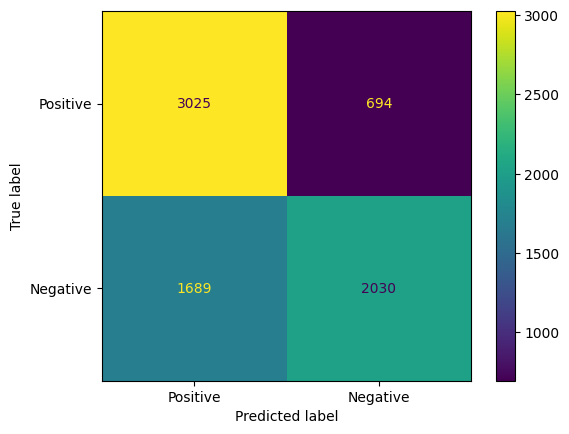

In [24]:
cm = confusion_matrix(y_test,predicted_output)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Positive','Negative'])
cm_display.plot()
plt.show()

In [26]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_bow, y_train)
predicted_output = dtc.predict(X_test_bow)
accuracy_dtc = accuracy_score(y_test, predicted_output)
precision_dtc = precision_score(y_test, predicted_output, average='weighted')
recall_dtc = recall_score(y_test, predicted_output, average='weighted')
f1_dtc = f1_score(y_test, predicted_output, average='weighted')
accuracy_dtc, precision_dtc, recall_dtc, f1_dtc

(0.7190104866899705, 0.719033354527132, 0.7190104866899705, 0.7190031524301186)

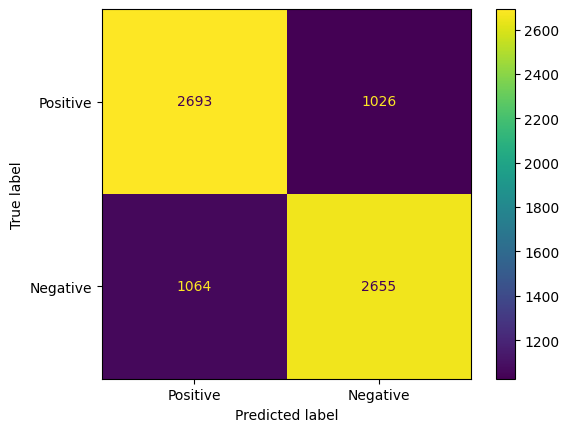

In [27]:
cm = confusion_matrix(y_test,predicted_output)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Positive','Negative'])
cm_display.plot()
plt.show()

In [31]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_bow, y_train)
predicted_rfc = rfc.predict(X_test_bow)

accuracy_rfc = accuracy_score(y_test, predicted_rfc)
precision_rfc = precision_score(y_test, predicted_rfc, average='weighted')
recall_rfc = recall_score(y_test, predicted_rfc, average='weighted')
f1_rfc = f1_score(y_test, predicted_rfc, average='weighted')

accuracy_rfc, precision_rfc, recall_rfc, f1_rfc

(0.8566819037375638,
 0.8566823163565469,
 0.8566819037375638,
 0.8566818622890664)

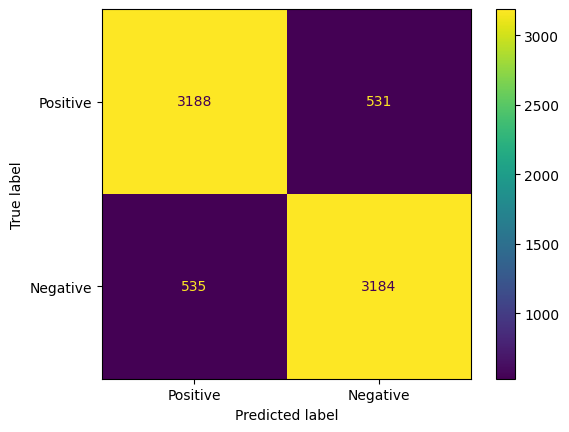

In [33]:
cm = confusion_matrix(y_test,predicted_rfc)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Positive','Negative'])
cm_display.plot()
plt.show()

In [34]:
metrics_data = {
    "Algorithm": ["Gaussian Naive Bayes", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_gnb, accuracy_dtc, accuracy_rfc],
    "Precision": [precision_gnb, precision_dtc, precision_rfc],
    "Recall": [recall_gnb, recall_dtc, recall_rfc],
    "F1-Score": [f1_gnb, f1_dtc, f1_rfc],
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics_styled = df_metrics.style.highlight_max(subset=["Accuracy", "Precision", "Recall", "F1-Score"], color='lightgreen')
df_metrics_styled

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,Gaussian Naive Bayes,0.679618,0.693467,0.679618,0.673780
1,Decision Tree,0.719010,0.719033,0.719010,0.719003
2,Random Forest,0.856682,0.856682,0.856682,0.856682


In [ ]:
import joblib as job
job.dump(rfc,'model_rfc_tfidf.pkl')